In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

from scipy.fft import fft, fftfreq, fftshift
from ipywidgets import interact, interactive, fixed, interact_manual
from bruges import filters

#  Wavelets

Um aspecto fundamental de qualquer interpretação sísmica em quais amplitudes são usadas para mapear reservatórios é a forma da wavelet e a resolução sísmica, em termos de reconhecimento de topo e base das camadas, é controlada pelas propriedades da wavelet.

O traço sísmico é composto de energia e é composto por uma variedade de frequência. 


##  Exemplos de wavelet 

Na interpretação sísmica são utilizadas <i>wavelets</i> idealizadas para gerar traços sínteticos a partir de poços, já que a wavelet exata do traço sísmico é desconhecida. A seguir serão apresentadas alguns exemplos de <i>wavelets</i>.

### Wavelet Ricker 

A <i> wavelet</i> Ricker - segunda derivada da função gaussiana - é definida por uma frequência central única e tem apenas dois lobos laterais. É frequentemente utilizada como <i>wavelet</i> de fase zero em modelagens sintéticas de traços sísmicos. <a href="https://www.researchgate.net/post/Why_Ricker_wavelets_are_not_appropriate_for_synthetic_seismograms">Hosken (1988)</a> e <a href="https://books.google.com.br/books/about/Seismic_Amplitude.html?id=1RYmAwAAQBAJ&redir_esc=y">Simm e Bacon</a> (2014) desaconselha fortemente o uso desta <i> wavelet </i> para a criação de traços sísmicos, os quais podemos enuciar:
    
 <ol>
  <li>Elas não são observadas na natureza;</li>
     <li>As 'standard' computable wavelets for rough and ready synthetic seismograms, they suffer from a confusion of definition-there are several types and</li>
  <li>Ter apenas uma única definição de parâmetro os torna inflexíveis demais para a aplicação de sismograma sintético.</li>
  <li>The Ricker types which show the most similarity with wavelets encountered in synthetic seismogram work may have two loops, three loops or be intermediate fractional-derivative wavelets.</li>
     <li> Minimum-phase Ricker wave lets suffer from a delay which depends on the choice of sample interval. Such
a delay can be subtracted out in an arbitrary way, but again no standard convention exists for doing this. </li>
</ol> 

Matematicamente, a <i>wavelet</i> Ricker pode ser definida como:
    
$$ A(t) = (1-2\pi^2f_M^2t^2)e^{-\pi^2f_M^2t^2} $$

In [2]:
#Criando uma wavelet ricker utilizando o pacote bruges
#frequência de 25Hz, taxa de amostragem de 2ms e  tempo de duração de 256ms
wave_ricker,t_wave = filters.wavelets.ricker(0.512,dt=0.002,f=25,return_t=True)

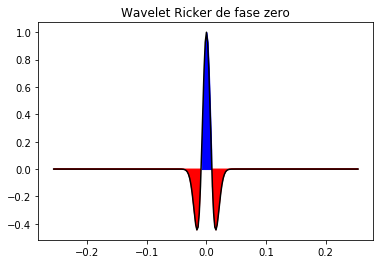

In [3]:
plt.title('Wavelet Ricker de fase zero')
plt.plot(t_wave,wave_ricker,color='black')
plt.fill_between(x=t_wave,y1=wave_ricker,y2=0,where=(wave_ricker>0),color='blue')
plt.fill_between(x=t_wave,y1=wave_ricker,y2=0,where=(wave_ricker<0),color='red')

### Wavelet Ormsby 

In [4]:
#Criando uma wavelet ricker utilizando o pacote bruges
#Frequências: [5,10,35,60], taxa de amostragem de 2ms e  tempo de duração de 256ms
wave_ormsby,t_wave = filters.wavelets.ormsby(duration=0.512,dt=0.002,f=[5,10,35,60],return_t=True)

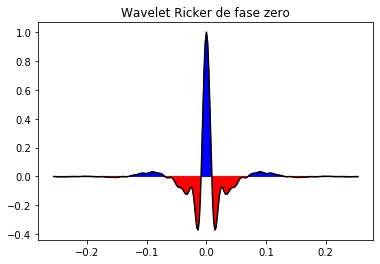

In [5]:
plt.title('Wavelet Ricker de fase zero')
plt.plot(t_wave,wave_ormsby,color='black')
plt.fill_between(x=t_wave,y1=wave_ormsby,y2=0,where=(wave_ormsby>0),color='blue')
plt.fill_between(x=t_wave,y1=wave_ormsby,y2=0,where=(wave_ormsby<0),color='red')

### Wavelet Gabor

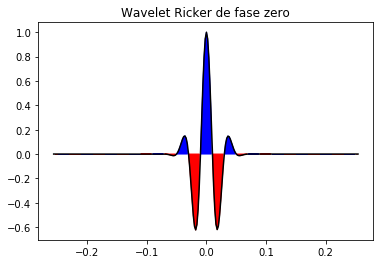

In [6]:
#Criando uma wavelet ricker utilizando o pacote bruges
#Frequências: [5,10,35,60], taxa de amostragem de 2ms e  tempo de duração de 256ms
wave_gabor,t_wave = filters.wavelets.gabor(duration=0.512,dt=0.002,f=25,return_t=True)

plt.title('Wavelet Ricker de fase zero')
plt.plot(t_wave,wave_gabor,color='black')
plt.fill_between(x=t_wave,y1=wave_gabor,y2=0,where=(wave_gabor>0),color='blue')
plt.fill_between(x=t_wave,y1=wave_gabor,y2=0,where=(wave_gabor<0),color='red')

### Plotando os espectros de frequência das wavelets 

In [7]:
N = len(t_wave)
dt=0.002
f_max =  1/(2*dt)

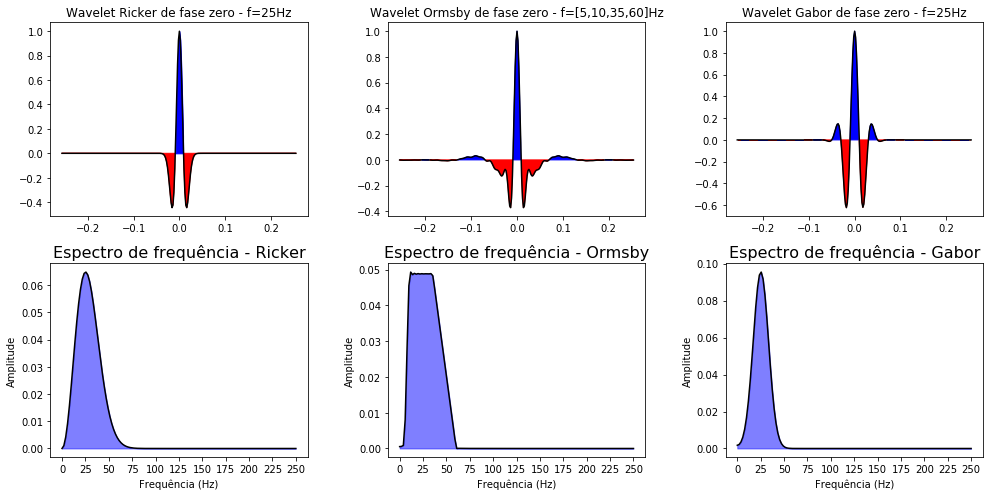

In [8]:
fig, axes = plt.subplots(ncols=3,nrows=2,figsize=(14,7))

#Plotado wavelet Ricker

axes[0][0].set_title('Wavelet Ricker de fase zero - f=25Hz')
axes[0][0].plot(t_wave,wave_ricker,color='black')
axes[0][0].fill_between(x=t_wave,y1=wave_ricker,y2=0,where=(wave_ricker>0),color='blue')
axes[0][0].fill_between(x=t_wave,y1=wave_ricker,y2=0,where=(wave_ricker<0),color='red')

#Plotado wavelet Ormsby

axes[0][1].set_title('Wavelet Ormsby de fase zero - f=[5,10,35,60]Hz')
axes[0][1].plot(t_wave,wave_ormsby,color='black')
axes[0][1].fill_between(x=t_wave,y1=wave_ormsby,y2=0,where=(wave_ormsby>0),color='blue')
axes[0][1].fill_between(x=t_wave,y1=wave_ormsby,y2=0,where=(wave_ormsby<0),color='red')

#Plotado wavelet gabor

axes[0][2].set_title('Wavelet Gabor de fase zero - f=25Hz')
axes[0][2].plot(t_wave,wave_gabor,color='black')
axes[0][2].fill_between(x=t_wave,y1=wave_gabor,y2=0,where=(wave_gabor>0),color='blue')
axes[0][2].fill_between(x=t_wave,y1=wave_gabor,y2=0,where=(wave_gabor<0),color='red')

#Plotado o espectro de frequencia da wavelet Ricker

yf = fft(wave_ricker)
xf = np.linspace(0,f_max,N//2)

axes[1][0].plot(xf,2.0/N * np.abs(yf[:N//2]),c='black')

axes[1][0].fill_between(x=xf,y1= 2.0/N * np.abs(yf[0:N//2]),y2=0,
                 color='blue',alpha=0.5,
                 where=(2.0/N * np.abs(yf[0:N//2])>0))

axes[1][0].set_xticks(np.arange(0,275,25))

axes[1][0].set_xlabel('Frequência (Hz)')

axes[1][0].set_ylabel('Amplitude')

axes[1][0].set_title('Espectro de frequência - Ricker',fontsize=16)

#Plotado o espectro de frequencia da wavelet Ormsby

yf = fft(wave_ormsby)
xf = np.linspace(0,f_max,N//2)

axes[1][1].plot(xf,2.0/N * np.abs(yf[:N//2]),c='black')

axes[1][1].fill_between(x=xf,y1= 2.0/N * np.abs(yf[0:N//2]),y2=0,
                 color='blue',alpha=0.5,
                 where=(2.0/N * np.abs(yf[0:N//2])>0))

axes[1][1].set_xticks(np.arange(0,275,25))

axes[1][1].set_xlabel('Frequência (Hz)')

axes[1][1].set_ylabel('Amplitude')

axes[1][1].set_title('Espectro de frequência - Ormsby',fontsize=16)

#Plotado o espectro de frequencia da wavelet gabor

yf = fft(wave_gabor)
xf = np.linspace(0,f_max,N//2)

axes[1][2].plot(xf,2.0/N * np.abs(yf[:N//2]),c='black')

axes[1][2].fill_between(x=xf,y1= 2.0/N * np.abs(yf[0:N//2]),y2=0,
                 color='blue',alpha=0.5,
                 where=(2.0/N * np.abs(yf[0:N//2])>0))

axes[1][2].set_xticks(np.arange(0,275,25))

axes[1][2].set_xlabel('Frequência (Hz)')

axes[1][2].set_ylabel('Amplitude')

axes[1][2].set_title('Espectro de frequência - Gabor',fontsize=16)

fig.tight_layout()

### Carregando o modelo sintético do notebook anterior 

In [9]:
df = pd.read_csv('Dados/traco_sintetico.csv')
df.head()

,Time,Vp,AI,Rc,t_synth_1
0,0.000,1900.0,4845000.0,0.0,0.0
1,0.002,1900.0,4845000.0,0.0,0.0
2,0.004,1900.0,4845000.0,0.0,0.0
3,0.006,1900.0,4845000.0,0.0,0.0
4,0.008,1900.0,4845000.0,0.0,0.0


In [10]:
def wavelet_comp(df,wave_type,duration,f1,f2,f3,f4,dt=0.002):
    fig,axes = plt.subplots(ncols=4,figsize=(8,5))

    for ax in axes:
        ax.set_ylim(0.05,0.55)
        ax.invert_yaxis()
        
    color = ['lightgreen','yellow','green','orange','blue']
    
    for i,j in zip(df.Vp.unique(),color):
        axes[0].fill_betweenx(y=df.Time,
                         x1=1,
                         x2=0,
                         where=df.Vp==i,
                         color=j,
                     alpha=0.6)

    axes[1].plot(df.Rc,df.Time,color='black')
    axes[1].set_title('Coeficiente de Reflexão')

    if wave_type =='ricker':
        wave,t_wave = wave_ormsby,t_wave = filters.wavelets.ricker(duration=duration,dt=dt,f=f1,return_t=True)
    
    if wave_type =='ormsby':
        wave,t_wave = wave_ormsby,t_wave = filters.wavelets.ormsby(duration=duration,dt=dt,f=[f1,f2,f3,f4],return_t=True)
    
    if wave_type =='gabor':
        wave,t_wave = wave_ormsby,t_wave = filters.wavelets.gabor(duration=duration,dt=dt,f=f1,return_t=True)
        
    axes[2].plot(wave,t_wave,color='black')
    axes[2].fill_betweenx(y=t_wave,
                     x1=wave,
                     x2=0,
                     where=wave>0,color='blue')

    axes[2].plot(wave,t_wave,color='black')
    axes[2].fill_betweenx(y=t_wave,
                     x1=wave,
                     x2=0,
                     where=wave<0,color='red')

    axes[2].set_ylim(t_wave.min(),t_wave.max())

    axes[2].set_title('Wavelet')
    
    trace = np.convolve(wave,df.Rc,mode='same')
    
    axes[3].plot(trace,df.Time,color='black')
    
    axes[3].fill_betweenx(y=df.Time,
                 x1=trace,
                 x2=0,
                 where=trace>0,color='blue')
    
    axes[3].fill_betweenx(y=df.Time,
                 x1=trace,
                 x2=0,
                 where=trace<0,color='red')

    axes[3].set_title('Traço Sísmico')

    fig.text(x=0.50,y=0.5,s='*',fontsize=16)

    fig.text(x=0.76,y=0.5,s='=',fontsize=16)

    fig.tight_layout()

In [11]:
@interact(duration_ms=(128,512,64),
                 f1_hz=(0,100,2.5),
                 f2_hz=(4,100,2.5),
                 f3_hz=(10,100,2.5),
                 f4_hz=(20,100,2.5),
         wave_type=['ricker','ormsby','gabor'])
def update(wave_type,duration_ms,f1_hz,f2_hz,f3_hz,f4_hz):
    wavelet_comp(df,wave_type,duration_ms/1000,f1_hz,f2_hz,f3_hz,f4_hz)

interactive(children=(Dropdown(description='wave_type', options=('ricker', 'ormsby', 'gabor'), value='ricker')…